In [1]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 157M/163M [00:01<00:00, 123MB/s]
100% 163M/163M [00:02<00:00, 78.4MB/s]


In [6]:
from zipfile import ZipFile
file_name = "face-mask-dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


#Import teh dependiencies

In [8]:
import os
import numpy as no
import pandas as pd
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
with_mask_file = os.listdir("/content/data/with_mask")

In [11]:
print(with_mask_file[0:8])

['with_mask_3673.jpg', 'with_mask_2523.jpg', 'with_mask_2184.jpg', 'with_mask_1061.jpg', 'with_mask_2354.jpg', 'with_mask_13.jpg', 'with_mask_1941.jpg', 'with_mask_2266.jpg']


In [13]:
without_mask_file = os.listdir("/content/data/without_mask")
print(len(without_mask_file))
print(with_mask_file[0:8])

3828
['with_mask_3673.jpg', 'with_mask_2523.jpg', 'with_mask_2184.jpg', 'with_mask_1061.jpg', 'with_mask_2354.jpg', 'with_mask_13.jpg', 'with_mask_1941.jpg', 'with_mask_2266.jpg']


#Image processing


In [14]:
with_mask_label = [1]*3725
without_mask_label = [0]*3828

In [17]:
labels = with_mask_label + without_mask_label
print(labels)
print(labels[0:10])
print(labels[-10:])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<function matplotlib.pyplot.show(close=None, block=None)>

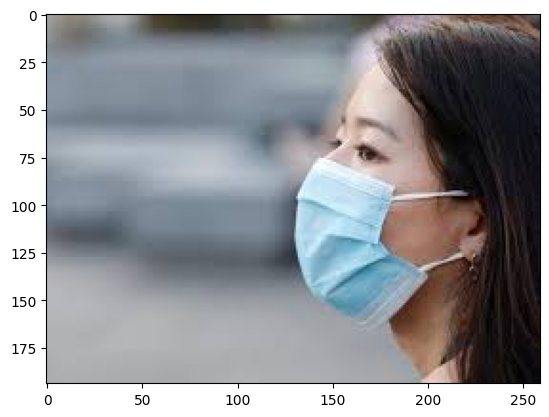

In [20]:
#display teh image
img = mpimg.imread("/content/data/with_mask/with_mask_2500.jpg")
imgplot = plt.imshow(img)
plt.show

In [21]:
img.shape

(194, 259, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

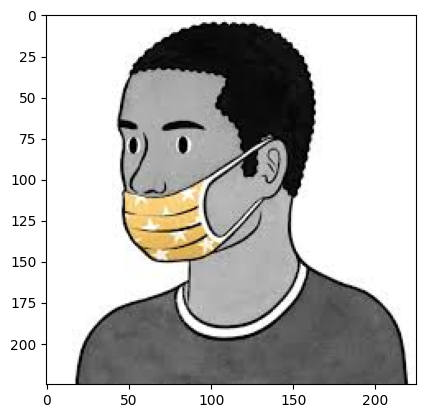

In [22]:
#display teh image
img = mpimg.imread("/content/data/with_mask/with_mask_2509.jpg")
imgplot = plt.imshow(img)
plt.show

In [23]:
img.shape

(225, 225, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

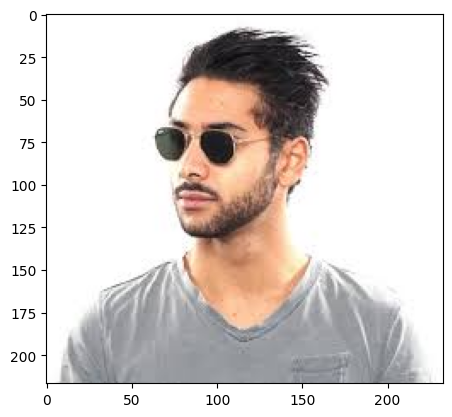

In [26]:
#display teh image
img = mpimg.imread("/content/data/without_mask/without_mask_2500.jpg")
imgplot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

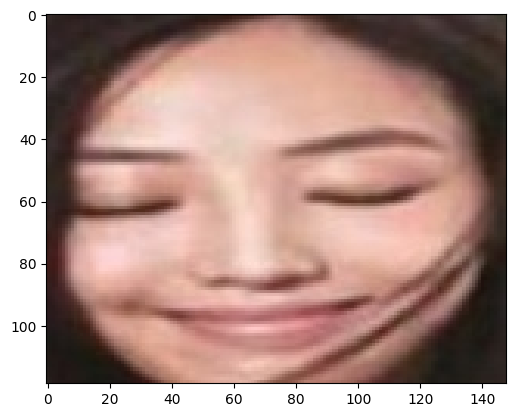

In [27]:
img = mpimg.imread("/content/data/without_mask/without_mask_250.jpg")
imgplot = plt.imshow(img)
plt.show

In [30]:
#here teh sizes of teh image are different we need to resize the image
#Resize te img
#convrt te img to numpy array
import numpy as np
with_mask_path = "/content/data/with_mask/"
without_mask_path = "/content/data/without_mask/"

data = []

for img_name in with_mask_file:
  image = Image.open(with_mask_path + img_name)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for img_name in without_mask_file:
  image = Image.open(without_mask_path + img_name)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

array([[[147, 171, 171],
        [146, 170, 170],
        [146, 170, 171],
        ...,
        [115,   4,  10],
        [114,   3,   9],
        [113,   2,   8]],

       [[151, 175, 175],
        [150, 174, 174],
        [150, 174, 174],
        ...,
        [115,   4,  10],
        [114,   3,   9],
        [113,   2,   8]],

       [[156, 179, 180],
        [156, 178, 180],
        [157, 179, 181],
        ...,
        [115,   4,  10],
        [114,   3,   9],
        [114,   3,   9]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
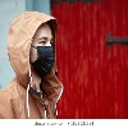

In [31]:
len(data)
data[0].shape
data[0]

In [32]:
x = np.array(data)
y = np.array(labels)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [35]:
print(x_test.shape, y_train.shape)

(1511, 128, 128, 3) (6042,)


In [36]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [37]:
y_train_scaled = y_train/255
y_test_scaled = y_test/255

In [38]:
import tensorflow as tf
from tensorflow import keras

In [41]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(x_train_scaled, y_train_scaled, epochs=5,validation_split = 0.1)

Epoch 1/5
170/170 [==============================] - 124s 720ms/step - loss: 0.0546 - accuracy: 0.4995 - val_loss: 0.0197 - val_accuracy: 0.5140
Epoch 2/5
170/170 [==============================] - 125s 737ms/step - loss: 0.0264 - accuracy: 0.5052 - val_loss: 0.0141 - val_accuracy: 0.5140
Epoch 3/5
170/170 [==============================] - 128s 754ms/step - loss: 0.0220 - accuracy: 0.5056 - val_loss: 0.0144 - val_accuracy: 0.5140
Epoch 4/5
170/170 [==============================] - 129s 758ms/step - loss: 0.0203 - accuracy: 0.5056 - val_loss: 0.0140 - val_accuracy: 0.5140
Epoch 5/5
170/170 [==============================] - 128s 756ms/step - loss: 0.0193 - accuracy: 0.5056 - val_loss: 0.0136 - val_accuracy: 0.5140


In [45]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 14s 298ms/step - loss: 3.2363 - accuracy: 0.5083
Test Accuracy = 0.508272647857666


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')